## H1B Visa

- 첫 세션에서 다루지 못한 내용들이 많습니다 
- [이곳](https://www.kaggle.com/nsharan/h-1b-visa/kernels)의 kaggle kernel을 참고해 문제를 풀어주세요
- EDA에 자주 쓰이지만 매우 기초적인 함수만 사용했습니다

### Attribute Information

- __CASE_STATUS__
    - The CASE_STATUS field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval.
<br>
<br>
- EMPLOYER_NAME
    - Name of the employer submitting labor condition application.
<br>
<br>
- SOC_NAME
    - Occupational name associated with the SOC_CODE. SOC_CODE is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
<br>
<br>
- JOB_TITLE
    - Title of the job.
<br>
<br>
- FULL_TIME_POSITION
    - Y = Full Time Position; N = Part Time Position.
<br>
<br>
- PREVAILING_WAGE
    - Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
<br>
<br>
- YEAR
    - Year in which the H-1B visa petition was filed.
<br>
<br>

# EDA

In [2]:
import numpy as np
import matplotlib
import pandas as pd
# import seaborn as sns
# from subprocess import check_output
# from matplotlib.ticker import FuncFormatter

#### 1. 데이터 확인
- h1b_train.csv 파일을 df_train으로 불러오세요

In [3]:
# Your Code Here #
df_train = pd.read_csv("h1b_train.csv")

- feature의 개수와 training example의 개수를 확인하세요

In [4]:
# Your Code Here
print('Number of entries:', df_train.shape )

Number of entries: (1802458, 11)


- 각 feature의 null값 개수를 확인하세요

In [5]:
# Your Code Here
print('Number of null:',df_train.isnull().sum())

Number of null: Unnamed: 0                0
CASE_STATUS               8
EMPLOYER_NAME            35
SOC_NAME              10706
JOB_TITLE                26
FULL_TIME_POSITION        9
PREVAILING_WAGE          51
YEAR                      8
WORKSITE                  0
lon                   64045
lat                   64045
dtype: int64


#### 2. 전처리

In [6]:
# CASE_STATUS -> CERTIFIED or DENIED
# EMPLOYER_NAME -> 고용주 회사
# SOC_NAME -> 직업군
# JOB_TITLE -> 직무
df_train.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1349742,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
1,789205,CERTIFIED,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
2,1617140,CERTIFIED,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
3,2757905,CERTIFIED,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
4,1127948,WITHDRAWN,VALUE SOFTWARE PRODUCTS INC,COMPUTER SYSTEMS ANALYSTS,SOLUTIONS ARCHITECT,Y,71614.0,2015.0,"MANASSAS, VIRGINIA",-77.475267,38.750949


#### 2.1 CASE_STATUS
- Certified랑 Denied만 남기고 나머지 행은 지워주세요

In [7]:
# Your Code Here
df_train = df_train[(df_train['CASE_STATUS'] == 'CERTIFIED') | (df_train['CASE_STATUS'] == 'DENIED') ]
df_train

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1349742,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
1,789205,CERTIFIED,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
2,1617140,CERTIFIED,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
3,2757905,CERTIFIED,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
5,693102,DENIED,"UNIVERSITY OF CALIFORNIA, SAN DIEGO","MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,Y,42120.0,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811
6,2662510,CERTIFIED,GOOGLE INC.,"Computer Software Engineers, Applications",SOFTWARE ENGINEER,Y,82035.0,2011.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052
7,636434,CERTIFIED,"COMPREHAB, INC.",PHYSICAL THERAPISTS,PHYSICAL THERAPIST,N,64168.0,2016.0,"GASTONIA, NORTH CAROLINA",-81.187301,35.262082
8,2265757,CERTIFIED,JPMORGAN CHASE AND CO.,"Software Developers, Applications",APPLICATIONS DEVELOPER,Y,92726.0,2012.0,"COLUMBUS, OHIO",-82.998794,39.961176
9,2927315,CERTIFIED,"IRONBRIDGE CONSULTING, LLC","Information Security Analysts, Web Developers,...",SOFTWARE ENGINEER/ NETWORK ANALYST,Y,57866.0,2011.0,"ARLINGTON, VIRGINIA",-77.106770,38.879970
10,1696111,CERTIFIED,"AXON SOLUTIONS, INC.",Computer Systems Analysts,MANAGING CONSULTANT,Y,91998.0,2014.0,"UNIVERSAL CITY, CALIFORNIA",-118.350578,34.139769


#### 2-2. Certified와 Denied의 개수를 확인하세요

In [8]:
# Your Code Here
df_train['CASE_STATUS'].value_counts()

CERTIFIED    1570316
DENIED         56571
Name: CASE_STATUS, dtype: int64

#### 2-3. Certified는 0, Denied는 1로 바꿔주세요

In [9]:
# Your Code Here

df_train['CASE_STATUS'] = df_train['CASE_STATUS'].replace('CERTIFIED',0)
df_train['CASE_STATUS'] = df_train['CASE_STATUS'].replace('DENIED',1)

df_train

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1349742,0,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
1,789205,0,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
2,1617140,0,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
3,2757905,0,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
5,693102,1,"UNIVERSITY OF CALIFORNIA, SAN DIEGO","MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,Y,42120.0,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811
6,2662510,0,GOOGLE INC.,"Computer Software Engineers, Applications",SOFTWARE ENGINEER,Y,82035.0,2011.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052
7,636434,0,"COMPREHAB, INC.",PHYSICAL THERAPISTS,PHYSICAL THERAPIST,N,64168.0,2016.0,"GASTONIA, NORTH CAROLINA",-81.187301,35.262082
8,2265757,0,JPMORGAN CHASE AND CO.,"Software Developers, Applications",APPLICATIONS DEVELOPER,Y,92726.0,2012.0,"COLUMBUS, OHIO",-82.998794,39.961176
9,2927315,0,"IRONBRIDGE CONSULTING, LLC","Information Security Analysts, Web Developers,...",SOFTWARE ENGINEER/ NETWORK ANALYST,Y,57866.0,2011.0,"ARLINGTON, VIRGINIA",-77.106770,38.879970
10,1696111,0,"AXON SOLUTIONS, INC.",Computer Systems Analysts,MANAGING CONSULTANT,Y,91998.0,2014.0,"UNIVERSAL CITY, CALIFORNIA",-118.350578,34.139769


In [10]:
# DINIED 비율 = 3%
75439/(2092970+75439)

# denied 가 1이므로
ratio = df_train['CASE_STATUS'].sum()/ df_train['CASE_STATUS'].count()
ratio


0.03477254412875633

#### 3-1. Full_time_position에서 Y는 1, N은 0으로 바꿔주세요

In [11]:
# Your Code Here

df_train['FULL_TIME_POSITION'] = df_train['FULL_TIME_POSITION'].replace('N',0)
df_train['FULL_TIME_POSITION'] = df_train['FULL_TIME_POSITION'].replace('Y',1)

df_train

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1349742,0,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,1,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
1,789205,0,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,1,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
2,1617140,0,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,1,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
3,2757905,0,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,1,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
5,693102,1,"UNIVERSITY OF CALIFORNIA, SAN DIEGO","MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,1,42120.0,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811
6,2662510,0,GOOGLE INC.,"Computer Software Engineers, Applications",SOFTWARE ENGINEER,1,82035.0,2011.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052
7,636434,0,"COMPREHAB, INC.",PHYSICAL THERAPISTS,PHYSICAL THERAPIST,0,64168.0,2016.0,"GASTONIA, NORTH CAROLINA",-81.187301,35.262082
8,2265757,0,JPMORGAN CHASE AND CO.,"Software Developers, Applications",APPLICATIONS DEVELOPER,1,92726.0,2012.0,"COLUMBUS, OHIO",-82.998794,39.961176
9,2927315,0,"IRONBRIDGE CONSULTING, LLC","Information Security Analysts, Web Developers,...",SOFTWARE ENGINEER/ NETWORK ANALYST,1,57866.0,2011.0,"ARLINGTON, VIRGINIA",-77.106770,38.879970
10,1696111,0,"AXON SOLUTIONS, INC.",Computer Systems Analysts,MANAGING CONSULTANT,1,91998.0,2014.0,"UNIVERSAL CITY, CALIFORNIA",-118.350578,34.139769


#### 4-1. Prevailing_wage 변수를 히스토그램으로 그려보세요

In [12]:
df_train[df_train.PREVAILING_WAGE < 200000]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1349742,0,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,1,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830
1,789205,0,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,1,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929
2,1617140,0,WIPRO LIMITED,"Computer Occupations, All Other",PROJECT MANAGER,1,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180
3,2757905,0,"CPO SERVICES, INC.",Orthotists and Prosthetists,STAFF PROSTHETIST,1,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649
5,693102,1,"UNIVERSITY OF CALIFORNIA, SAN DIEGO","MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,1,42120.0,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811
6,2662510,0,GOOGLE INC.,"Computer Software Engineers, Applications",SOFTWARE ENGINEER,1,82035.0,2011.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052
7,636434,0,"COMPREHAB, INC.",PHYSICAL THERAPISTS,PHYSICAL THERAPIST,0,64168.0,2016.0,"GASTONIA, NORTH CAROLINA",-81.187301,35.262082
8,2265757,0,JPMORGAN CHASE AND CO.,"Software Developers, Applications",APPLICATIONS DEVELOPER,1,92726.0,2012.0,"COLUMBUS, OHIO",-82.998794,39.961176
9,2927315,0,"IRONBRIDGE CONSULTING, LLC","Information Security Analysts, Web Developers,...",SOFTWARE ENGINEER/ NETWORK ANALYST,1,57866.0,2011.0,"ARLINGTON, VIRGINIA",-77.106770,38.879970
10,1696111,0,"AXON SOLUTIONS, INC.",Computer Systems Analysts,MANAGING CONSULTANT,1,91998.0,2014.0,"UNIVERSAL CITY, CALIFORNIA",-118.350578,34.139769


(0, 200000)

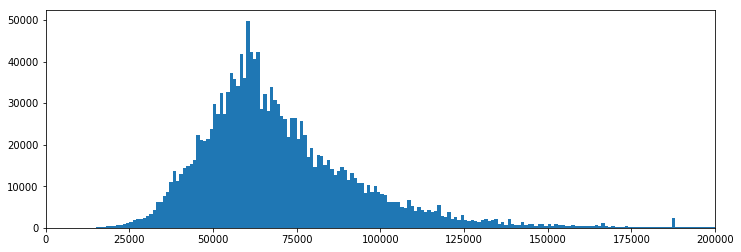

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.subplots(1, 1, figsize=(12, 4))
# Your Code Here
plt.hist(df_train[df_train.PREVAILING_WAGE < 200000].PREVAILING_WAGE, bins = 200)
plt.xlim([0, 200000])

#### 4-2. Prevailing_wage 변수를 log 변환하고 다음과 같이 plot을 그려주세요

In [14]:
# Your Code Here

change = np.log(df_train.PREVAILING_WAGE)


/Users/hyeoni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
print(change)

0          11.028239
1          11.279024
2          11.210225
3          11.028239
5          10.648278
6          11.314901
7          11.069260
8          11.437404
9          10.965885
10         11.429522
11         11.365330
12         11.549344
13         11.229209
14         11.220579
15         11.097698
16         10.967319
17         11.474985
18         10.931874
19         10.952121
20         11.398064
21         11.200595
22         11.242625
24         11.258846
25         11.006391
26         10.613615
27         10.921793
28         11.127189
29         11.100436
30         11.314401
31         11.237159
             ...    
1802423    11.446123
1802424    10.801370
1802425    11.004663
1802426    10.625295
1802427    11.523747
1802428    11.263669
1802429    10.887400
1802430    10.614131
1802431    10.544999
1802433    11.010861
1802435    11.048952
1802436    10.912357
1802437    11.088522
1802438    10.471582
1802439    11.373502
1802441    10.538794
1802442    10

In [16]:
type(change.values)
type(change)

pandas.core.series.Series

/Users/hyeoni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hyeoni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


(9, 13)

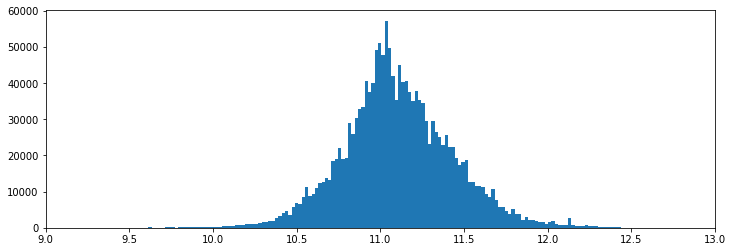

In [17]:
plt.subplots(1, 1, figsize=(12, 4))
# Your Code Here
plt.hist(change[((change.values >= 9) & (change.values <= 13))], bins=200)
plt.xlim([9, 13])

#### 5.1 Employer_name

In [18]:
# EMPLOYER_NAME을 보면 텍스트 전처리가 필요해 보입니다. 
# Punctuation이 문제인 것 같습니다.

df_train['EMPLOYER_NAME'].sort_values()

898123                       "I HAVE A DREAM" FOUNDATION
446264                                  "K" LINE AMERICA
1461640                                 "K" LINE AMERICA
52568                                   "K" LINE AMERICA
1419485                                 "K" LINE AMERICA
1785766                           "K" LINE AMERICA, INC.
782746                            "K" LINE AMERICA, INC.
549252                            "K" LINE AMERICA, INC.
1056834                           "K" LINE AMERICA, INC.
596871                            "K" LINE AMERICA, INC.
1684026                 "K" LINE LOGISITCS (U.S.A.) INC.
45913                        "K" LINE LOGISTICS USA INC.
758887                       "K" LINE LOGISTICS USA INC.
1167350                     "K" LINE LOGISTICS USA, INC.
123895                        &QUOT;K&QUOT; LINE AMERICA
97058                            &TV COMMUNICATIONS INC.
871877                           &TV COMMUNICATIONS INC.
1308957                        

#### 5.2 EMPLOYER_NAME의 쉼표와 온점을 지워주세요

In [19]:
# Your Code Here
df_train['EMPLOYER_NAME'] = df_train['EMPLOYER_NAME'].str.replace('\.|\,', '', regex=True)

In [20]:
df_train['EMPLOYER_NAME']


0                     INTERNATIONAL SYSTEMS TECHNOLOGIES INC
1                                                 GOOGLE INC
2                                              WIPRO LIMITED
3                                           CPO SERVICES INC
5                         UNIVERSITY OF CALIFORNIA SAN DIEGO
6                                                 GOOGLE INC
7                                              COMPREHAB INC
8                                      JPMORGAN CHASE AND CO
9                                  IRONBRIDGE CONSULTING LLC
10                                        AXON SOLUTIONS INC
11                                     MICROSOFT CORPORATION
12                                           MOBILE IRON INC
13                                           TECHNIP USA INC
14                                    COMMVAULT AMERICAS INC
15                                               CUMMINS INC
16                 PACIFIC INVESTMENT MANAGEMENT COMPANY LLC
17         UNIVERSITY OF

#### 5.3 EMPLOYER_NAME 변수의 빈도를 이용해 다음과 같은 plot을 그려주세요

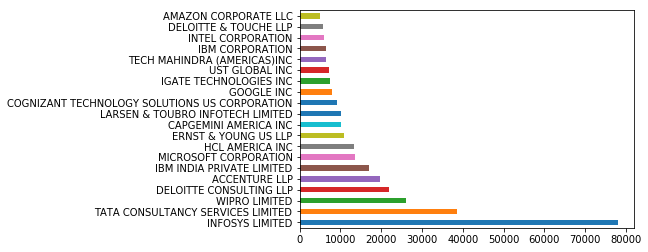

In [25]:
# Your Code Here


graph = df_train.EMPLOYER_NAME.value_counts().head(20).plot(kind='barh') # 시리즈의 행 단위 합계

graph


#### 6.1 SOC_NAME 변수의 빈도를 이용해 다음과 같은 plot을 그려주세요

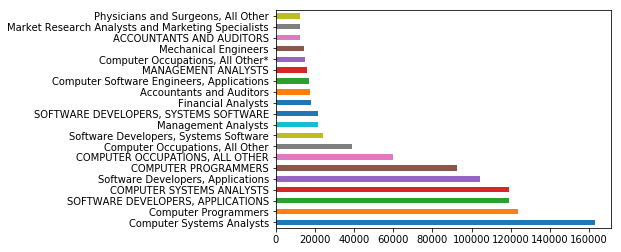

In [26]:
# Your Code Here
graph = df_train.SOC_NAME.value_counts().head(20).plot(kind='barh') # 시리즈의 행 단위 합계

graph

#### 6.2 Year 변수를 이용해 연도별로 CASE_STATUS에 따라 빈도를 나타낸 plot을 그려주세요

In [ ]:
# Your Code Here

fig = plt.gcf()
fig.set_size_inches(15,6)
plt.title('Case Status by Year')
plt.show()
case_year

In [ ]:
# 연도에 따라 certificated 비율이 늘어나고 있습니다.

count_cer = case_year.loc[case_year['CASE_STATUS'] == 0]
count_de = case_year.loc[case_year['CASE_STATUS'] == 1]
rate = count_cer['SOC_NAME'].values / (count_cer['SOC_NAME'].values + count_de['SOC_NAME'].values)
rate

# 고생하셨습니다 :)